In [1]:
from sklearn.decomposition import *
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import *
from umap import UMAP
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../Modeling/ridge_regression_coefficients_all_countries.csv', index_col = 0)

In [4]:
df.head()

,Best Alpha,Population_Coeff,Inflation_Coeff,Import_Coeff,Export_Coeff,Score,Export_GDP_Correlation
Country,,,,,,,
BDI,0.01,0.001293,-0.000388,0.000449,-2.183857e-07,0.862419,0.664439
BFA,0.01,0.019002,-0.002105,0.001540,1.803168e-03,0.974553,0.951462
BGD,0.01,0.075913,-0.030418,0.033052,1.773468e-02,0.983529,0.982825
BHR,0.01,0.006992,-0.020819,0.006354,7.328568e-03,0.907860,0.926710
BHS,0.01,0.000291,-0.003714,0.001493,-1.048423e-03,0.758223,-0.676031


In [5]:
df.drop(columns = ['Best Alpha', 'Score', 'Export_GDP_Correlation'], inplace = True)

In [6]:
df

,Population_Coeff,Inflation_Coeff,Import_Coeff,Export_Coeff
Country,,,,
BDI,0.001293,-0.000388,0.000449,-2.183857e-07
BFA,0.019002,-0.002105,0.001540,1.803168e-03
BGD,0.075913,-0.030418,0.033052,1.773468e-02
BHR,0.006992,-0.020819,0.006354,7.328568e-03
BHS,0.000291,-0.003714,0.001493,-1.048423e-03
...,...,...,...,...
VCT,0.000001,-0.000465,0.000188,-2.984769e-05
VUT,0.000023,-0.000517,0.000162,7.897728e-06
WSM,0.000003,-0.000153,0.000174,1.758584e-05


# Standard Scaler for each row 

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.T).T

In [8]:
df_scaled = pd.DataFrame(df_scaled, index = df.index, columns = df.columns)
df_scaled


,Population_Coeff,Inflation_Coeff,Import_Coeff,Export_Coeff
Country,,,,
BDI,1.525885,-1.160802,0.176326,-0.541408
BFA,1.701016,-0.874187,-0.429495,-0.397335
BGD,1.364102,-1.433729,0.236337,-0.166710
BHR,0.585473,-1.731314,0.532307,0.613534
BHS,0.534892,-1.533975,1.155944,-0.156861
...,...,...,...,...
VCT,0.324818,-1.623985,1.104143,0.195024
VUT,0.401388,-1.684873,0.938749,0.344735
WSM,-0.062688,-1.412328,1.413364,0.061652


In [9]:
df = df_scaled
df

,Population_Coeff,Inflation_Coeff,Import_Coeff,Export_Coeff
Country,,,,
BDI,1.525885,-1.160802,0.176326,-0.541408
BFA,1.701016,-0.874187,-0.429495,-0.397335
BGD,1.364102,-1.433729,0.236337,-0.166710
BHR,0.585473,-1.731314,0.532307,0.613534
BHS,0.534892,-1.533975,1.155944,-0.156861
...,...,...,...,...
VCT,0.324818,-1.623985,1.104143,0.195024
VUT,0.401388,-1.684873,0.938749,0.344735
WSM,-0.062688,-1.412328,1.413364,0.061652


# KMeans clustering

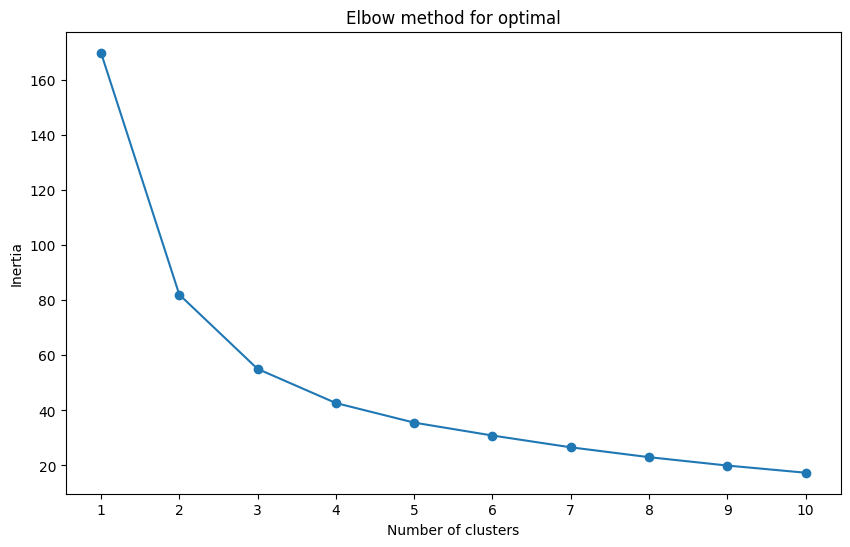

In [10]:
from sklearn.cluster import KMeans
inertia_values = []

cluster_range = range(1, 11)
for k in cluster_range:
    model = KMeans(n_clusters=k, n_init=10, random_state=42)
    model.fit(df)
    inertia_values.append(model.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method for optimal')
plt.xticks(cluster_range)
plt.show()

In [11]:
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

In [12]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(df.drop(columns=['Cluster']), df['Cluster'])
print("Silhouette Score:", ((sil_score + 1) / 2) * 100)

Silhouette Score: 69.39679330865168


In [13]:
df.Cluster.value_counts()

Cluster
6    21
9    19
4    12
3    11
1    10
7     8
2     5
8     3
0     2
5     1
Name: count, dtype: int64

# Dimensionality Reduction

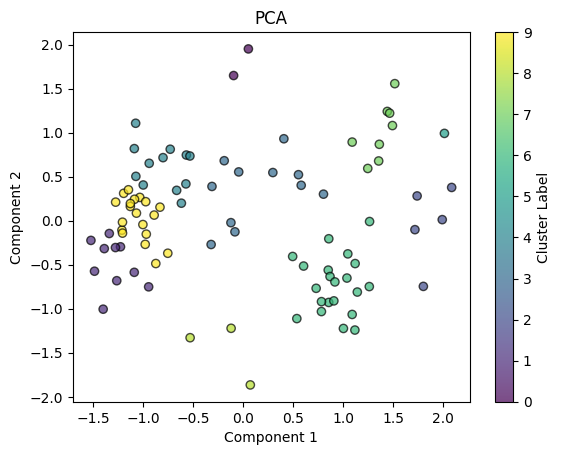

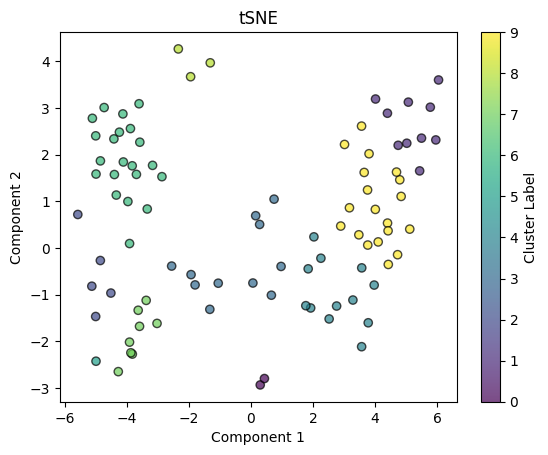

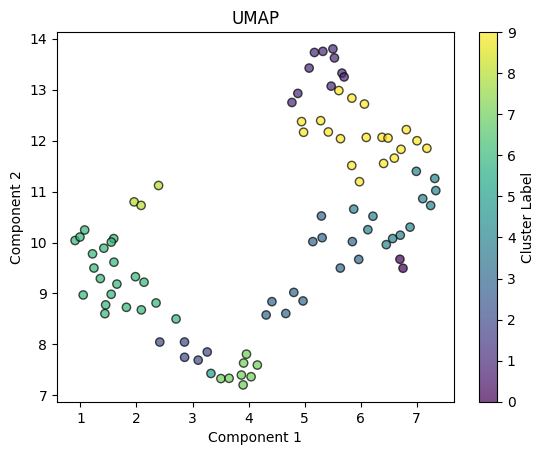

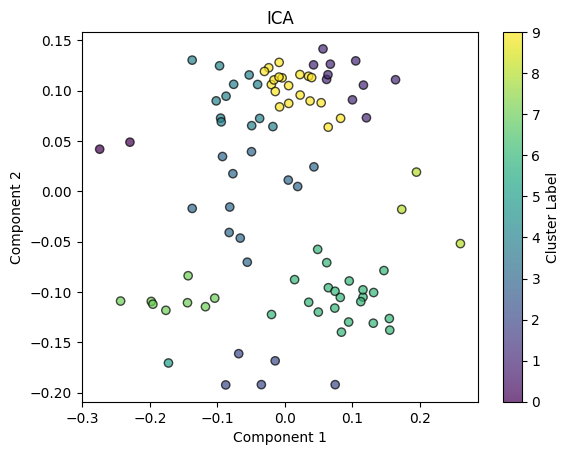

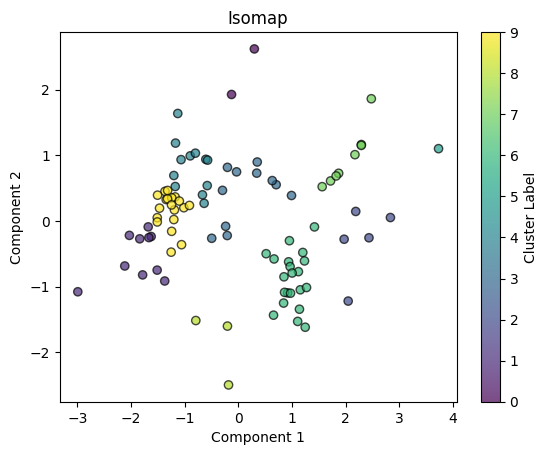

In [14]:
def visualize_dim_red(name, alg, data, clusters):
    al = alg(n_components=2)
    tr = al.fit_transform(data)

    plt.scatter(tr[:, 0], tr[:, 1], c=clusters, cmap='viridis', alpha=0.7, edgecolors='k')

    plt.title(name)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.colorbar(label="Cluster Label")
    plt.show()

algs = {'PCA': PCA, 'tSNE': TSNE, 'UMAP': UMAP, 'ICA': FastICA, 'Isomap': Isomap}

 
clusters = df['Cluster']


df_features = df.drop(columns=['Cluster'])


for name, alg in algs.items():
    visualize_dim_red(name, alg, df_features, clusters)


In [15]:
df

,Population_Coeff,Inflation_Coeff,Import_Coeff,Export_Coeff,Cluster
Country,,,,,
BDI,1.525885,-1.160802,0.176326,-0.541408,9
BFA,1.701016,-0.874187,-0.429495,-0.397335,9
BGD,1.364102,-1.433729,0.236337,-0.166710,3
BHR,0.585473,-1.731314,0.532307,0.613534,6
BHS,0.534892,-1.533975,1.155944,-0.156861,6
...,...,...,...,...,...
VCT,0.324818,-1.623985,1.104143,0.195024,6
VUT,0.401388,-1.684873,0.938749,0.344735,6
WSM,-0.062688,-1.412328,1.413364,0.061652,6


In [16]:
df = df.rename(columns={'Cluster': 'Cluster_KMeans'})

In [17]:
df

,Population_Coeff,Inflation_Coeff,Import_Coeff,Export_Coeff,Cluster_KMeans
Country,,,,,
BDI,1.525885,-1.160802,0.176326,-0.541408,9
BFA,1.701016,-0.874187,-0.429495,-0.397335,9
BGD,1.364102,-1.433729,0.236337,-0.166710,3
BHR,0.585473,-1.731314,0.532307,0.613534,6
BHS,0.534892,-1.533975,1.155944,-0.156861,6
...,...,...,...,...,...
VCT,0.324818,-1.623985,1.104143,0.195024,6
VUT,0.401388,-1.684873,0.938749,0.344735,6
WSM,-0.062688,-1.412328,1.413364,0.061652,6


In [19]:
df.to_csv('clustered_data.csv')